# Automatic differentiation with dual numbers

A dual number is defined as

\begin{align} 
x = a + b \epsilon \tag{1}
\end{align}

where $\epsilon^2 = 0$. Here, the real part is $a$ and the dual part is $b$.\
Dual numbers are useful because they can be used in differentiation. Consider the square of a dual number:
\begin{align} 
x^2 = (a + b \epsilon)^2 = a^2 + 2ab\epsilon \tag{2}
\end{align}
Using the subsitution $a = x$ and $b = 1$, the dual part of $x^2$ is $2x$, which is the derivative of $x^2$ with respect to $x$.

Extending this further, if I have a function $f(x)$, I can find the derivative of that function at $x_0$ by substituting the dual number, $x = x_0 + 1 \epsilon$, into the function. The outputted dual number contains a real part given by $f(x_0)$ and a dual part, given by $f'(x_0)$.

## Example: differentiating a function
Consider the function

\begin{align} 
f(x) = \log{(\sin{x})} + x^2 \cos{x} \tag{3}
\end{align}

The differentiated function is given by 

\begin{align} 
f'(x) = \cot{x} + 2x\cos{x} - x^2 \sin{x} \tag{4}
\end{align}

Let's compare the values of the differentiated function at $x=1.5$ using both the analytical form of $f'(x)$ and by using dual numbers.

In [2]:
#import the required packages
import numpy as np
import matplotlib.pyplot as plt
from dual_autodiff import Dual

In [3]:
#Define the above function and first order differentiated function such that it works on dual numbers
def f(x):
    return np.log(np.sin(x)) + x**2 * np.cos(x)

def fprime(x):
    return 1 / np.tan(x) + 2 * x * np.cos(x) - x **2 * np.sin(x)

In [4]:
x = 1.5
x_dual = Dual (1.5, {'x': 1})

print(f"f(x = 1.5) = {f(x): .3f}")
print(f"Analytical derivative: f'(x = 1.5) = {fprime(x)}")
print(f"Using dual numbers derivative: f'(x = 1.5) = {f(x_dual).dual['x']}")

f(x = 1.5) =  0.157
Analytical derivative: f'(x = 1.5) = -1.9612372705533612
Using dual numbers derivative: f'(x = 1.5) = -1.9612372705533612


We can see that the analytical derivative and the derivative found using dual numbers are exactly the same, which is what we expect.

## Example: partial differentiation

The Dual class can take in multiple dual components to make partial differentiation easier. Using the Dual class, let's compute the following function and its partial derivatives at the point $(1,2)$:

\begin{align} 
f(x, y) = y^2 \sinh{(3x+2)}+2y+x \tag{5}
\end{align}

\begin{align} 
f_x = 3y^2 \cosh{(3x+2)}+1 \tag{6}
\end{align}

\begin{align} 
f_y = 2y\sinh{(3x+2)} + 2 \tag{7}
\end{align}


In [5]:
#Define the function and the partial derivatives
def fmv (x, y):
    return y**2 * np.sinh(3 * x + 2) + 2 * y + x

def fmv_x(x, y):
    return 3 * y**2 * np.cosh(3 * x + 2) + 1

def fmv_y (x, y):
    return 2 * y * np.sinh(3 * x + 2) + 2

In [6]:
#define dual numbers x and y

x_dual = Dual(1, {'x': 1, 'y': 0})
y_dual = Dual(2, {'x': 0, 'y': 1})

print(f"f(x = 1, y = 2) = {fmv(1, 2): .3f}")
print(f"Analytical partial derivative wrt x: f_x(x = 1, y = 2) = {fmv_x(1, 2)}")
print(f"Using dual numbers partial derivative wrt x: f_x(x = 1, y = 2) = {fmv(x_dual, y_dual).dual['x']}")
print(f"Analytical partial derivative wrt y: f_y(x = 1, y = 2) = {fmv_y(1, 2)}")
print(f"Using dual numbers partial derivative wrt y: f_y(x = 1, y = 2) = {fmv(x_dual, y_dual).dual['y']}")

f(x = 1, y = 2) =  301.813
Analytical partial derivative wrt x: f_x(x = 1, y = 2) = 891.5193822974542
Using dual numbers partial derivative wrt x: f_x(x = 1, y = 2) = 891.5193822974542
Analytical partial derivative wrt y: f_y(x = 1, y = 2) = 298.812842311155
Using dual numbers partial derivative wrt y: f_y(x = 1, y = 2) = 298.812842311155


As demonstrated above, when dual numbers are input into the function, the result is a dual number where the dual components represent the partial derivatives of the function at the specified point.\
The dual numbers must be inputted into the function as so 
```python
x_dual = Dual(x0, {'x': 1, {'y': 0}, {'z': 0}...})
```
where x0 is the x-value that the derivative is being evaluated at.

## Example: adding custom functions

The tools.py file contains a tool_store that has all the base implementations of the class, but dual_autodiff allows the user to add and remove custom functions. Let's demonstrate using the sigmoid function:

\begin{align} 
s(x) = \frac{1}{1+e^{-x}} \tag{8}
\end{align}

\begin{align} 
s'(x) = s(x) (1-s(x)) \tag{9}
\end{align}



In [7]:
from dual_autodiff.tools import add_function, remove_function, get_functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Add the function to the tool_store
add_function('sigmoid', sigmoid, sigmoid_derivative)

# Find derivative of sigmoid at x=2
x_dual = Dual(2, {'x': 1})
analytical_result = sigmoid_derivative(2)
dual_result = sigmoid(x)
print(f"s(x = 2) = {sigmoid(2): .3f}")
print(f"Analytical derivative: s'(x = 2) = {sigmoid_derivative(2)}")
print(f"Using dual numbers derivative: s'(x = 2) = {sigmoid(x_dual).dual['x']}")
# Difference in numbers due to floating point handling

# Can remove function from tools_store
print('Check if sigmoid in tools store before removal: ', 'sigmoid' in list(get_functions().keys()))
remove_function('sigmoid')
print('Check if sigmoid in tools store after removal: ', 'sigmoid' in list(get_functions().keys()))
print(get_functions().keys())

s(x = 2) =  0.881
Analytical derivative: s'(x = 2) = 0.10499358540350662
Using dual numbers derivative: s'(x = 2) = 0.1049935854035065
Check if sigmoid in tools store before removal:  True
Check if sigmoid in tools store after removal:  False
dict_keys(['sin', 'cos', 'tan', 'sinh', 'cosh', 'tanh', 'exp', 'log', 'sqrt', 'arcsin', 'arccos', 'arctan'])


## Comparing the numerical derivative to the analytical derivative

Using the function given by equation $(3)$, let's compare the convergence of the numerical derivative to the analytical deerivative at the same point $x=1.5$. We can compute the numerical derivative of a function at a point using either the forward difference approximation

\begin{align} 
f'(x) \approx \frac{f(x+h)-f(x)}{h} \tag{10}
\end{align}

or the central difference approximation 

\begin{align} 
f'(x) \approx \frac{f(x+h)-f(x-h)}{2h} \tag{11}
\end{align}


In [8]:
# Forward difference approximation
def num_derivative_fwd (f, x, h = 1e-5):
    return (f(x + h) - f(x)) / h

# Central difference approximation
def num_derivative_cnt (f, x, h = 1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

Plot of the convergence of the numerical derivative at smaller step sizes.

In [9]:
h = [1e-1, 1e-2, 1e-3, 1e-5, 1e-7, 1e-9] # Step sizes

# Make empty arrays
fwd = np.zeros(len(h))
cnt = np.zeros(len(h))

# Compute numerical derivative using either method at different step sizes
for i in range(len(h)):
    fwd[i] = num_derivative_fwd(f, 1.5, h[i])
    cnt[i] = num_derivative_cnt(f, 1.5, h[i])

x_analytical = fprime(1.5)

# Calculate absolute difference
diff_fwd = np.abs(fwd - x_analytical)
diff_cnt = np.abs(cnt - x_analytical)

[]

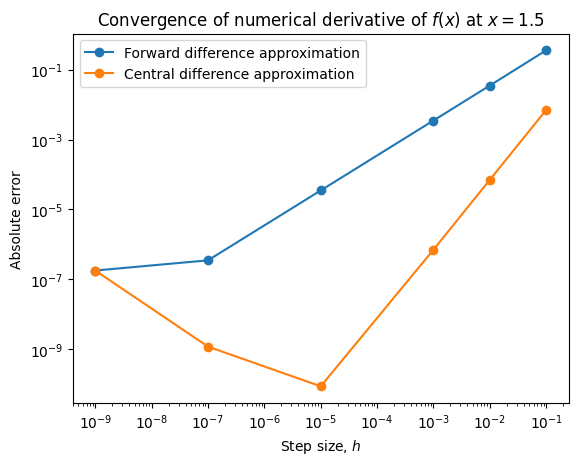

In [16]:
plt.plot(h, diff_fwd, marker = 'o',  label = 'Forward difference approximation')
plt.plot(h, diff_cnt, marker = 'o', label = 'Central difference approximation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Step size, $h$')
plt.ylabel(r'Absolute error')
plt.legend()
#plt.grid()
plt.title(r'Convergence of numerical derivative of $f(x)$ at $x=1.5$')
plt.savefig('numerical_derivative.png')
plt.plot()

The central difference approximation is more accurate, because the truncation error scales as $O(h^2)$ whereas for the forward difference approximation, the error scales as $O(h)$. Smaller values of $h$ will decrease the truncation error, as shown in the plot above.

However, at smaller levels of $h$, the error seems to increase again. This is due to the way the computer deals with floating point numbers: the numerator $f(x+h)-f(x)$ or $f(x+h)-f(x-h)$ becomes a very small number leading to catastrophic cancellation. This error scales as $O(1/h)$, hence is larger for small $h$. To find optimum $h$, you need a balance between these two errors.